# ASIF BUX 

# ENSF 592 Programming Fundamentals for Data Engineers - FINAL EXAM

## Question 1: Functions (5pts)

For large numbers, the natural logrithm `ln()`, logarithm to base e, can be approximated by multiplying the number of digits by 2.3. For example, ln(7654321) is approximately 7 * 2.3 = 16.1.

Write a function: `ln_approx()` that takes a number as argument and retuns the approximate value of the logarithm as explained above. The function should handle both `int` and `float` arguments, and truncate floats prior to counting the digits. Other types, such as `str` do not need to be handeled, i.e. you can assume that the caller takes care of providing either `int` or `float` arguments.

With this function, write a program that computes approximate and actual natural logarithms for 5 large numbers of your choice, testing both int and float, and prints results side by side for comparison. Actual logarithms are available in the `math` module, see `math.log()`.

In [43]:
import math 
def ln_approx(number):
    # First step is to check if the number is either int or float
    if(type(number) != int): # if it is not int then lets truncate it to whole number without any decimals 
        number = int(number) 
        #print(number)
    # One easy and quick way to get the number of digits is to convert the integer value to string and get the length
    size = len(str(number)) 
    print('Size: ' , size)
    approx = round(size * 2.3, 2)
    return approx

def print_comparsion(number):
    print('Value from ln_approx: ', ln_approx(number))
    print('Value from math.log: ', round(math.log(number), 1), '\n')  

print('First Number: 7654321') 
print_comparsion(7654321)

print('Second Number: 7654321.123')
print_comparsion(7654321.123)

print('Thrid Number: 2231323123123.99543545345345')
print_comparsion(2231323123123.99543545345345)

print('Fourth Number: 23432423423')
print_comparsion(23432423423)

print('Fifth Number: 1000')
print_comparsion(1000)
    

First Number: 7654321
Size:  7
Value from ln_approx:  16.1
Value from math.log:  15.9 

Second Number: 7654321.123
Size:  7
Value from ln_approx:  16.1
Value from math.log:  15.9 

Thrid Number: 2231323123123.99543545345345
Size:  13
Value from ln_approx:  29.9
Value from math.log:  28.4 

Fourth Number: 23432423423
Size:  11
Value from ln_approx:  25.3
Value from math.log:  23.9 

Fifth Number: 1000
Size:  4
Value from ln_approx:  9.2
Value from math.log:  6.9 



## Question 2: Random (5pts)
Ludo is a board game where players race their tokens to the finish line by rolling a six-sided die and advancing as many steps as the number on the die shows:  
https://en.wikipedia.org/wiki/Ludo_(board_game)

There are 57 steps to take for a token. We wonder how many rolls of dice are necessary on average to complete these 57 steps with one token? 

Write a program that simulates 1000 games, where for each game, a single six-sided die is rolled until the sum of the rolls reaches or exceeds 57 and the number of rolls are counted. The program prints the average number of rolls of the 1000 games.

Note that the expected sum of n rolls is 3.5n. Therefore, the average obtained by the simulation should be close to 16.3 rolls.

In [44]:
np.random.seed()
l = []
for i in range(1000):
    rolls = 0
    counter = 0
    while(rolls <= 57):
        dice = np.random.randint(1,7)
        rolls += dice # add this to rolls and rolls goes up as we countine playing the game until one round is won = 57
        counter += 1
    l.append(counter)
print('Average:', sum(l)/len(l))

Average: 16.996


## Question 3: Files and strings (8pts)
In the file `email.txt` the content of an email are saved. Write a program that will read the contents of this file, builds a dictionary with the following keys: **from**, **to**, **date**, **subject**, and **body**. The values in the dictionary are the corresponding contents of the email for each key. Finally, the program saves this dictionary in json format to a file `email.json`.



In [45]:
import os.path 
from os import path
import re 
import json 

filename = 'email.txt'
try:
    newFileName = filename.split('.')[0] + ".json"
    aDict = {}
    with open(filename,'r') as fin:
        body= ''
        recording = False
        for line in fin:
            counter +=1
            if line.startswith(r'From:'): 
                aDict['from'] = line.split('From:')[1].strip()
            if recording:
                body += line + ''
            if line.startswith(r'To:'):
                aDict['to'] = line.split('To:')[1].strip()
                recording = True
            if line.startswith(r'Date:'):
                aDict['date'] = line.split('Date:')[1].strip()
            if line.startswith(r'Subject:'):
                aDict['subject'] = line.split('Subject:')[1].strip() 
        aDict['body'] = body.strip() # this program preserves the lines in between the body in the dictionary value field
        #print(aDict)
    with open(newFileName, 'w') as outfile:
        json.dump(aDict, outfile) 
    print('Action Completed! Please check your folder for', newFileName, 'file') 
except:
    print('Something went wrong.')

Action Completed! Please check your folder for email.json file


## Question 4: Classes (5pts)
Create a class named Citrus which has:
- a `circumference` data variable which is a float (outer (un-peeled) circumference in cm)
- and two class variables: `taste` that can be 'sweet', 'sour' or 'bitter', `peel_thickness` which is a float (thickness of the peel in cm).

Create two classes named Orange and Lemon . These must be sub-classes of the Citrus
class.

Implement a `get_peeled_volume()` method in the parent class that uses the instance's circumference and the class' peel thickness to calculate the volume of the fruit assuming the shape is spherical.

Use 0.7 and 0.3 for peel_thickness and 'sweet' and 'sour' for taste of Orange and Lemon,
respectively. 

The fruit's circumference is an input given per instance, when first created. For example, 
```
print(round(Orange(12).get_peeled_volume(), 2))
```
should print 7.42, and
```
print(round(Lemon(12).get_peeled_volume(), 2))
```
should print 17.48.

Include these two print statements to confirm proper implementation of Orange and Lemon classes.

The volume `V` of a sphere with radius `r` is given by:
$$
V = \frac{4}{3}\cdot \pi \cdot r^3
$$

The circumference `c` of a sphere with radius `r` is given by:
$$
c = 2\pi\cdot r
$$

Note that the peeled radius needed for calculating the peeled volume is `r-peel_thickness`.

In [46]:
import math 

class Citrus:
    taste = 'TBD'
    peel_thicknes = 0.0
    
    def __init__(self, circumference):
        self.circumference = circumference
    
    def get_peeled_volume(self):
        r = (self.circumference/(2* math.pi))-self.peel_thicknes
        return ((4/3) * math.pi *(r**3)) 

class Orange(Citrus):
    taste = 'sweet'
    peel_thicknes= 0.7
    # using polymorphism
    
class Lemon(Citrus):
    taste = 'sour'
    peel_thicknes= 0.3 
    # using polymorphism

print('Orange', round(Orange(12).get_peeled_volume(), 2))
print('Lemon', round(Lemon(12).get_peeled_volume(), 2))

Orange 7.42
Lemon 17.48


## Question 5: Scraping (6pts)

Using `BeautifulSoup` and `requests`, get the Picture of the Day's **image url** and **name**, from NASA Astronomy Picture of the Day webpage for September 15, 2017, the link below:

https://apod.nasa.gov/apod/ap170915.html

The name to extract is `100 Steps Forward` and the URL is https://apod.nasa.gov/apod/image/1709/ConjuncionViaLacteaHumanoVenusLuna_Jaramillo.jpg

In [47]:
#Required modules
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import re

#Step 1: Get the URL
url = 'https://apod.nasa.gov/apod/ap170915.html'

# Step 2: Fire a request at the URL and store the response
response = requests.get(url)

#Step 3: Create a BeautifulSoup object
soup = BeautifulSoup(response.text,'lxml')
#print(soup.prettify())

#Step 4: Find the required items 

extracted_URL = soup.find('center').find_all('a')[1]['href'] 
# Since the url is in the first center, we will use find and get to the first match after that we 
#have to a tags and we can do find all on the a tags, then we extract the second ones 'href' 
complete_URL = 'https://apod.nasa.gov/apod/' + extracted_URL
print('Extracted URL:' , extracted_URL)
print('Complete URL:', complete_URL)
# Since the name is loctaed on the second center tag, I used find_all then we run into multiple b tags, 
#but since we needed the very first one, I just did find ('b') followed by text and strip() 
extracted_Name = soup.find_all('center')[1].find('b').text .strip()
print('Picture of The Day:',extracted_Name)

Extracted URL: image/1709/ConjuncionViaLacteaHumanoVenusLuna_Jaramillo.jpg
Complete URL: https://apod.nasa.gov/apod/image/1709/ConjuncionViaLacteaHumanoVenusLuna_Jaramillo.jpg
Picture of The Day: 100 Steps Forward


## Question 6: Data (6pts)
Read the CFL games data (cfl_data.csv) input file with pandas and do the following:
1. Remove all rows with missing data.
2. Remove all rows from pre-season games
3. Create a new column `TotalPts` containing the sum of `HomePts` and `AwayPts`
4. Print the average `TotalPts` per week using Pandas groupby, sorted by `TotalPts` in descending order.



In [99]:
import numpy as np 
import pandas as pd 

df = pd.read_csv("cfl_data.csv")

#Steop 1: Drop rows with missing data 
df = df.dropna()

#Step 2: Remove all rows from pre-season games 
df.drop(df.index[df['Week'] == ' Pre-Season A'], inplace = True)
df.drop(df.index[df['Week'] == ' Pre-Season B'], inplace = True)

#Step 3: Create a new column TotalPts containing the sum of HomePts and AwayPts
df['TotalPts'] = df['HomePts'] +df['AwayPts']

#Step 4: Print the average TotalPts per week using Pandas groupby, sorted by TotalPts in descending order.
groupeddf = df.groupby('Week').mean() 
display(groupeddf) 
groupeddf['TotalPts'].sort_values(ascending= False)

,AwayPts,HomePts,Attendance,TotalPts
Week,,,,
1,35.75,33.50,31461.50,69.25
10,26.25,30.75,31638.50,57.00
11,25.25,26.00,26041.50,51.25
2,21.50,22.75,23824.25,44.25
3,24.50,17.50,21447.50,42.00
4,20.75,31.25,30657.50,52.00
5,27.00,28.50,21913.50,55.50
6,25.00,28.00,28931.00,53.00
7,32.50,27.50,28852.50,60.00


Week
1     69.25
7     60.00
9     58.50
10    57.00
5     55.50
8     54.25
6     53.00
4     52.00
11    51.25
2     44.25
3     42.00
Name: TotalPts, dtype: float64

## Question 7: Visualization (5pts)
Using the DataFrame prepared in Question 6, choose a plot to show progression of points as the season unfolds. Plot average `TotalPts`, `HomePts`, and `AwayPts` for each `Week` from week 1 to week 11 in a line-plot for example. Label your plot components.

Date            object
Week             int64
AwayTeam        object
AwayPts          int64
HomeTeam        object
HomePts          int64
KickOffTime     object
Attendance     float64
Winner          object
TotalPts         int64
dtype: object
Date            object
Week             int64
AwayTeam        object
AwayPts          int64
HomeTeam        object
HomePts          int64
KickOffTime     object
Attendance     float64
Winner          object
TotalPts         int64
dtype: object


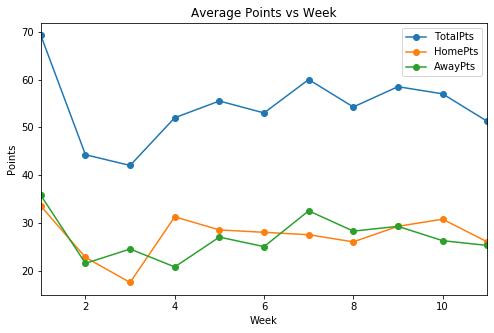

In [105]:
import matplotlib.pyplot as plt
# The datatype in Week coloumn is object type, so we need to make it numeric type in order to plot by Week 1 to Week 11
print(df.dtypes)
df['Week'] = pd.to_numeric(df['Week'])
print(df.dtypes)
groupeddf = df.groupby('Week').mean()
groupeddf.unstack('Week')['TotalPts'].plot(marker = 'o',label = 'TotalPts', figsize=(8,5))
groupeddf.unstack('Week')['HomePts'].plot(marker = 'o', label='HomePts')
groupeddf.unstack('Week')['AwayPts'].plot(marker = 'o', label='AwayPts'); 
plt.xlabel('Week') 
plt.ylabel('Points') 
plt.title('Average Points vs Week')
plt.legend();